# Assignment 2


#### 1. 复习上课内容以及复现课程代码

在本部分，你需要在复习上课内容和课程代码后，复现课程代码。 

#### 2. 回答以下理论题目

###       < 评阅点 >： 答案是否正确完整

###### 2.1 What conditions are required to make the BFS return the optimal solution ?

1. All costs between two nodes are positive or zero.
2. Sort the list used to maintain the searching history in every iteration.

##### 2.2 Is there a way to make DFS find the optimal solution ? (You may need to read some material about iterative DFS)

 1. It sorts the list by the sum of the cost for initial node to current node and the estimated cost from current node to the goal.
               total = cost(s,c) + estimated_cost(c,g)

 2. In every iteration, it check all path and prune some paths that will never be the optimal results.   


##### 2.3 In what conditions BFS is a better choice than DFS and vice versa ?

In [ ]:
在需要最优解的情况下，BFS比DFS更好。

##### 2.4 When can we use machine learning ?

自动驾驶，语音识别等

##### 2.5 What is the gradient of a function ?

The gradient of a function is the direction it rise fastest.

##### 2.6 How can we find the maximum value of a function using the information of gradient ?

#### 3. 实践部分  寻找地铁路线

### < 评阅点 >  1: 爬虫爬取数据是否完整;  2:搜索算法是否正确

In this part, although we recommend you to use Beijing subway, you still can use the subway map of any cities that you are interested in. 

![title](img/ditu.png)

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system.

Deadline: 2019-October-27

#### Procedures

#### 1. Get data from web.  

Some tips: 

a. You might need this package: requests[https://2.python-requests.org/en/master/] to get webpages

b.You might need to use Regular Expression and Beautiful Soap package to parse the webpages

In [8]:
import requests
url = 'http://www.httpbin.org/get'
params = {
    'key1':'value1',
    'key2':'value2'}
response = requests.get(url=url,params=params)
print(response.text)

{
  "args": {
    "key1": "value1", 
    "key2": "value2"
  }, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Host": "www.httpbin.org", 
    "User-Agent": "python-requests/2.22.0", 
    "X-Amzn-Trace-Id": "Root=1-5e2b8738-48d382881d1826b7dcf6041c"
  }, 
  "origin": "122.238.60.141", 
  "url": "http://www.httpbin.org/get?key1=value1&key2=value2"
}



##### 2. Preprocessing data

Some tips:

a. Find a suitable way to save the data you get from the web. (Note: The way you use to save the data should be able to be used to create the graph that your agent is going to explore)

In [19]:
gis = {
    "0111": "121.391832,31.116809",
    "0112": "121.399814,31.126929",
    "0113": "121.409334,31.136734",
    "0114": "121.42068,31.148312",
    "0115": "121.43627,31.161142",
    "0116": "121.44187,31.175383",
    "0117": "121.442801,31.188348",
    "0118": "121.444749,31.199152",
    "0119": "121.453247,31.211777",
    "0120": "121.457719,31.219937",
    "0121": "121.466688,31.223492",
    "0122": "121.479798,31.228753",
    "0123": "121.48085,31.23868",
    "0124": "121.474802,31.244699",
    "0125": "121.465,31.247808",
    "0126": "121.462366,31.253608",
    "0127": "121.465616,31.265275",
    "0128": "121.461893,31.27806",
    "0129": "121.458503,31.285845",
    "0130": "121.456458,31.29917",
    "0131": "121.455097,31.312943",
    "0132": "121.453464,31.325355",
    "0133": "121.447817,31.337798",
    "0134": "121.444185,31.345991",
    "0135": "121.440458,31.361557",
    "0136": "121.437357,31.376207",
    "0137": "121.434336,31.38774",
    "0138": "121.43103,31.398683",
    "0234": "121.307524,31.195431",
    "0235": "121.32795,31.1991",
    "0236": "121.334373,31.19958",
    "0237": "121.365797,31.223998",
    "0238": "121.380478,31.222334",
    "0239": "121.393671,31.220485",
    "0240": "121.410818,31.216959",
    "0241": "121.424336,31.224615",
    "0242": "121.43882,31.226025",
    "0243": "121.452711,31.229553",
    "0244": "121.46678,31.23614",
    "0245": "121.480166,31.239445",
    "0246": "121.490265,31.243034",
    "0247": "121.509075,31.243319",
    "0248": "121.521058,31.239393",
    "0249": "121.533264,31.235004",
    "0250": "121.550621,31.225524",
    "0251": "121.557067,31.216069",
    "0252": "121.563803,31.209437",
    "0253": "121.594061,31.207879",
    "0254": "121.608797,31.209985",
    "0255": "121.627183,31.216662",
    "0256": "121.662625,31.219828",
    "0257": "121.680961,31.219405",
    "0258": "121.687295,31.203168",
    "0259": "121.704572,31.192896",
    "0260": "121.728838,31.198286",
    "0261": "121.76216,31.205201",
    "0262": "121.803326,31.175116",
    "0263": "121.813395,31.155029",
    "0311": "121.437159,31.159648",
    "0312": "121.44963,31.164304",
    "0313": "121.450802,31.175724",
    "0314": "121.444739,31.182978",
    "0315": "121.433798,31.192584",
    "0316": "121.428032,31.20317",
    "0317": "121.423584,31.215865",
    "0318": "121.422883,31.224276",
    "0319": "121.419507,31.237991",
    "0320": "121.424183,31.244839",
    "0321": "121.436805,31.253",
    "0322": "121.447452,31.261022",
    "0323": "121.464746,31.255935",
    "0324": "121.483032,31.257464",
    "0325": "121.486639,31.265746",
    "0326": "121.485807,31.276632",
    "0327": "121.48899,31.287038",
    "0328": "121.489614,31.295096",
    "0329": "121.491552,31.311026",
    "0330": "121.491579,31.325399",
    "0331": "121.498185,31.337669",
    "0332": "121.50714,31.350804",
    "0333": "121.505406,31.363662",
    "0334": "121.49951,31.376604",
    "0335": "121.494571,31.387466",
    "0336": "121.486126,31.401287",
    "0337": "121.48254,31.40993",
    "0338": "121.46856,31.414137",
    "0339": "121.446217,31.414218",
    "0401": "121.443402,31.188814",
    "0402": "121.433798,31.192584",
    "0403": "121.428032,31.20317",
    "0404": "121.423584,31.215865",
    "0405": "121.422883,31.224276",
    "0406": "121.419507,31.237991",
    "0407": "121.424183,31.244839",
    "0408": "121.436805,31.253",
    "0409": "121.447452,31.261022",
    "0410": "121.46396,31.255155",
    "0411": "121.483032,31.257464",
    "0412": "121.495445,31.264649",
    "0413": "121.507604,31.26658",
    "0414": "121.519375,31.26358",
    "0415": "121.523944,31.257681",
    "0416": "121.526211,31.246166",
    "0417": "121.532323,31.235423",
    "0418": "121.536985,31.227528",
    "0419": "121.534433,31.217603",
    "0420": "121.52581,31.215231",
    "0421": "121.506336,31.214285",
    "0422": "121.496122,31.207672",
    "0423": "121.480988,31.20494",
    "0424": "121.470148,31.200335",
    "0425": "121.461154,31.197304",
    "0426": "121.450248,31.19218",
    "0501": "121.391832,31.116809",
    "0502": "121.392332,31.103958",
    "0503": "121.396745,31.095036",
    "0505": "121.408264,31.072997",
    "0507": "121.416485,31.051134",
    "0508": "121.42282,31.032955",
    "0509": "121.426326,31.024468",
    "0510": "121.416554,31.017141",
    "0511": "121.401635,31.013066",
    "0512": "121.387319,31.009198",
    "0513": "121.376495,31.006315",
    
    "0531": "121.423398, 31.005610", 
    "0532": "121.432426, 30.989364",
    "0533": "121.441921, 30.965917",
    "0534": "121.449034, 30.942045",
    "0535": "121.463212, 30.931131",
    "0536": "121.483833, 30.931959",
    "0537": "121.492545, 30.928784",
    "0538": "121.496327, 30.913906",
    
    "0621": "121.487012,31.159351",
    "0622": "121.50168,31.154367",
    "0623": "121.512956,31.154788",
    "0624": "121.521145,31.15557",
    "0625": "121.52227,31.165247",
    "0626": "121.517488,31.17825",
    "0627": "121.516396,31.191286",
    "0628": "121.52308,31.198949",
    "0629": "121.52979,31.209399",
    "0630": "121.534433,31.217603",
    "0631": "121.536985,31.227528",
    "0632": "121.532323,31.235423",
    "0633": "121.540892,31.239044",
    "0634": "121.549481,31.241974",
    "0635": "121.559229,31.245588",
    "0636": "121.57006,31.251371",
    "0637": "121.579756,31.256909",
    "0638": "121.588374,31.263292",
    "0639": "121.593488,31.270327",
    "0640": "121.59454,31.278007",
    "0641": "121.594976,31.286704",
    "0642": "121.595327,31.296804",
    "0643": "121.595846,31.308625",
    "0644": "121.595922,31.318355",
    "0645": "121.608989,31.327117",
    "0646": "121.600539,31.341305",
    "0647": "121.593445,31.353883",
    "0648": "121.581148,31.359297",
    "0721": "121.356426,31.407854",
    "0722": "121.364185,31.394383",
    "0723": "121.362293,31.370197",
    "0724": "121.368889,31.363427",
    "0725": "121.379313,31.350576",
    
    "0726": "121.373707,31.322173",
    
    "0727": "121.395296,31.326259",
    "0728": "121.405224,31.327225",
    "0729": "121.414775,31.321458",
    "0730": "121.420162,31.309963",
    "0731": "121.422947,31.29971",
    "0732": "121.428059,31.291225",
    "0733": "121.429477,31.280191",
    "0734": "121.429033,31.270157",
    "0735": "121.428339,31.262583",
    "0736": "121.436805,31.253",
    "0737": "121.444739,31.246256",
    "0738": "121.448574,31.240781",
    "0739": "121.45378,31.229694",
    "0740": "121.456628,31.219964",
    "0741": "121.456463,31.205392",
    "0742": "121.461154,31.197304",
    "0743": "121.463379,31.191311",
    "0744": "121.480035,31.177884",
    "0745": "121.492522,31.180277",
    "0746": "121.501124,31.184085",
    "0747": "121.506916,31.1874",
    "0748": "121.516396,31.191286",
    "0749": "121.530936,31.193539",
    "0750": "121.546398,31.193767",
    "0751": "121.556478,31.199531",
    "0752": "121.563888,31.209599",
    "0753": "121.569074,31.218236",
    "0820": "121.518803,31.06706",
    "0821": "121.51713,31.079655",
    "0822": "121.515133,31.089988",
    "0823": "121.512891,31.102197",
    "0824": "121.504377,31.124907",
    "0825": "121.496279,31.146696",
    "0826": "121.487012,31.159351",
    "0827": "121.50029,31.16671",
    "0828": "121.502631,31.176999",
    "0829": "121.501124,31.184085",
    "0830": "121.500749,31.19134",
    "0831": "121.496122,31.207672",
    "0832": "121.492716,31.217413",
    "0833": "121.489485,31.224674",
    "0834": "121.485885,31.233127",
    "0835": "121.481738,31.238695",
    "0836": "121.478026,31.248251",
    "0837": "121.475411,31.259035",
    "0838": "121.47525,31.2694",
    "0839": "121.485948,31.275811",
    "0840": "121.497039,31.282122",
    "0841": "121.507823,31.280577",
    "0842": "121.516066,31.278923",
    "0843": "121.524804,31.280818",
    "0844": "121.534441,31.284573",
    "0845": "121.541374,31.294899",
    "0846": "121.539677,31.301934",
    "0847": "121.538481,31.311023",
    "0848": "121.53857,31.321523",
    "0849": "121.538527,31.328516",
    "0918": "121.237677,30.990955",
    "0919": "121.235829,31.006987",
    "0920": "121.237126,31.022049",
    "0921": "121.237244,31.03603",
    "0922": "121.239238,31.059984",
    "0923": "121.237014,31.090393",
    "0924": "121.236257,31.110609",
    "0925": "121.267259,31.123976",
    "0926": "121.325378,31.143844",
    "0927": "121.344742,31.155955",
    "0928": "121.356047,31.161397",
    "0929": "121.375571,31.163862",
    "0930": "121.391169,31.172226",
    "0931": "121.403837,31.176123",
    "0932": "121.424997,31.180998",
    "0933": "121.43409,31.19119",
    "0934": "121.443046,31.201727",
    "0935": "121.456221,31.205776",
    "0936": "121.467219,31.208945",
    "0937": "121.475402,31.212073",
    "0938": "121.483036,31.215011",
    "0939": "121.492716,31.217413",
    "0940": "121.504895,31.222656",
    "0941": "121.52289,31.236125",
    "0942": "121.532323,31.235423",
    "0943": "121.555022,31.233791",
    
    "0944":"121.558458,31.231798",
    "0945":"121.577925 ,31.240976",
    "0946":"121.597698 ,31.252964",
    "0947":"121.611490 ,31.260875",
    "0948":"121.628533 ,31.264217",
    "0949":"121.639004 ,31.263773",
    "0950":"121.656525 ,31.266097",
    "0951":"121.668128 ,31.268294",
    "0952":"121.682880 ,31.271160",
    
    "1018": "121.361249,31.171619",
    "1019": "121.37097,31.175533",
    "1020": "121.37699,31.182886",
    "1041": "121.32795,31.1991",
    "1042": "121.334373,31.19958",
    "1043": "121.3539,31.197476",
    "1044": "121.373597,31.196049",
    "1045": "121.386467,31.199878",
    "1046": "121.398444,31.205074",
    "1047": "121.410671,31.204634",
    "1048": "121.417552,31.202784",
    "1049": "121.428754,31.202859",
    "1050": "121.440554,31.208208",
    "1051": "121.450434,31.213992",
    "1052": "121.464494,31.220991",
    "1053": "121.48116,31.222033",
    "1054": "121.489485,31.224674",
    "1055": "121.4939,31.234005",
    "1056": "121.490893,31.24483",
    "1057": "121.488739,31.250301",
    "1058": "121.489997,31.257185",
    "1059": "121.495112,31.264919",
    "1060": "121.50058,31.273946",
    "1061": "121.508339,31.28089",
    "1062": "121.51305,31.288214",
    "1063": "121.516743,31.295352",
    "1064": "121.521091,31.303618",
    "1065": "121.520633,31.308746",
    "1066": "121.514701,31.318613",
    "1067": "121.513177,31.327743",
    "1068": "121.513188,31.334451",
    "1114": "121.108972,31.304981",
    "1115": "121.123995,31.302118",
    "1116": "121.156828,31.294652",
    "1117": "121.168602,31.294335",
    "1118": "121.18725,31.291581",
    "1119": "121.206771,31.29994",
    "1120": "121.232625,31.337944",
    "1131": "121.24401,31.397409",
    "1132": "121.234426,31.383195",
    "1133": "121.251801,31.351371",
    "1134": "121.26104,31.335744",
    "1135": "121.28343,31.325402",
    "1137": "121.329748,31.303357",
    "1138": "121.355937,31.287647",
    "1139": "121.371318,31.282825",
    "1140": "121.382499,31.277205",
    "1141": "121.396412,31.274596",
    "1142": "121.410075,31.268278",
    "1143": "121.413834,31.256497",
    "1144": "121.41754,31.248068",
    "1145": "121.4241,31.244107",
    "1146": "121.430091,31.236727",
    "1147": "121.4371,31.226732",
    "1148": "121.441394,31.208906",
    "1149": "121.442314,31.201202",
    "1150": "121.448026,31.185365",
    "1151": "121.459229,31.179259",
    "1152": "121.464914,31.17265",
    "1153": "121.466,31.166117",
    "1154": "121.487012,31.159351",
    "1155": "121.517551,31.148698",
    "1156": "121.529691,31.152393",
    "1157": "121.54554,31.157148",
    
    "1158": "121.556038,31.155031",
    
    "1159": "121.577365,31.164663",
    "1160": "121.599723,31.159221",
    
    "1161": "121.598213 ,31.1380256900",
    "1162":"121.617461 ,31.1304034400",
    "1163":"121.668064 ,31.1412121600",
    
    "1220":"  121.362447 ,31.131138" ,
"1221":"  121.380987 ,31.136795" ,
"1222":"  121.392145 ,31.140688" ,
"1223":"  121.392402 ,31.155159" ,
"1224":"  121.397166 ,31.160209" ,
"1225":"  121.410534 ,31.163991" ,
"1226":"  121.419825 ,31.166947" ,
"1227":"  121.433537 ,31.168343" ,
"1228":"  121.443686 ,31.170307" ,
"1229":"  121.452698 ,31.174989" ,
"1230":"  121.456947 ,31.184902" ,
"1231":"  121.464114 ,31.193493" ,
"1232":"  121.461185 ,31.202028" ,

"1233":" 121.459372 , 31.216058" ,
"1234":" 121.459479 , 31.228050" ,
"1235":" 121.459017 , 31.240737" ,
"1236":" 121.471560 , 31.242297" ,
"1237":" 121.482546 , 31.243773" ,
"1238":" 121.498210 , 31.250066" ,
"1239":" 121.506932 , 31.253478" ,
"1240":" 121.512973 , 31.257908" ,
"1241":" 121.523777 , 31.264497" ,

"1242": " 121.532548 , 31.2686611" ,
"1243": " 121.544575 , 31.2751306" ,
"1244": " 121.552686 , 31.2797566" ,
"1245": " 121.561285 , 31.2804810" ,
"1246": " 121.578977 , 31.2824798" ,
"1247": " 121.589630 , 31.2800638" ,
"1248": " 121.602913 , 31.2800592" ,
"1249": " 121.615573 , 31.2798895" ,
"1250": " 121.626602 , 31.2800592" ,
"1251": " 121.638645 , 31.2631266" ,

    
    
    "1321": "121.326035,31.247368",
    "1322": "121.34169,31.2474",
    "1323": "121.362183,31.248367",
    "1324": "121.374143,31.243169",
    "1325": "121.388887,31.237862",
    "1327": "121.418989,31.237245",

    "1326":  " 121.394591 , 31.231701     "   ,
"1328":  " 121.423645 , 31.230389     "   ,
"1329":  " 121.430382 , 31.234270     "   ,
"1330":  " 121.438397 , 31.240820     "   ,
"1331":  " 121.444952 , 31.244361     "   ,
"1332":  " 121.458503 , 31.240774     "   ,
"1333":  " 121.462386 , 31.236407     "   ,
"1334":  " 121.462504 , 31.228527     "   ,
"1335":  " 121.464393 , 31.220398     "   ,
    
    "1336":" 121.474617 ,31.215655   ",
"1337":" 121.476216 ,31.209865   ",
"1338":" 121.481720 ,31.197430   ",
"1339":" 121.484241 ,31.182865   ",
"1340":" 121.487760 ,31.174420   ",
"1341":" 121.497051 ,31.171400   ",
"1342":" 121.512265 ,31.172823   ",
"1343":" 121.526566 ,31.176265   ",
"1344":" 121.540203 ,31.179257   ",
"1345":" 121.552058 ,31.180084   ",
"1346":" 121.557734 ,31.174714   ",
"1347":" 121.566456 ,31.169086   ",
"1348":" 121.581090 ,31.174438   ",
"1349":" 121.602494 ,31.178854   ",
"1350":" 121.614382 ,31.183489   ",
"1351":" 121.629080 ,31.189088   ",
    
    "1623": "121.599723,31.159221",
    
    
"1621":" 121.557862 ,31.201899",
"1622":" 121.583096 ,31.175632",
"1624":" 121.607022 ,31.110013",
"1625":" 121.611335 ,31.077747",
"1626":" 121.617493 ,31.054937",
"1627":" 121.649186 ,31.045433",
"1628":" 121.699225 ,31.050231",
"1629":" 121.761860 ,31.053761",
"1630":" 121.793918 ,31.026385",
"1631":" 121.850781 ,30.959173",
"1632":" 121.911056 ,30.923543",
"1633":" 121.930024 ,30.906901",

"1721":"  121.318985 ,31.193961",
"1722":"  121.293032 ,31.191630",
"1723":"  121.278666 ,31.186297",
"1724":"  121.254183 ,31.177908",
"1725":"  121.241823 ,31.175310",
"1726":"  121.223927 ,31.164046",
"1727":"  121.192213 ,31.161109",
"1728":"  121.151797 ,31.161191",
"1729":"  121.125651 ,31.158905",
"1730":"  121.096807 ,31.160461",
"1731":"  121.082076 ,31.134329",
"1732":"  121.049058 ,31.100505",
"1733":"  121.019543 ,31.098507",

"4101":"  121.512479 , 31.060764" ,
"4102":"  121.527392 , 31.056040" ,
"4103":"  121.530396 , 31.047860" ,
"4104":"  121.530697 , 31.040745" ,
"4105":"  121.532167 , 31.030761" ,
"4106":"  121.524496 , 31.025273" 
}

In [20]:
stations = {
    "0111": "莘庄",
    "0112": "外环路",
    "0113": "莲花路",
    "0114": "锦江乐园",
    "0115": "上海南站",
    "0116": "漕宝路",
    "0117": "上海体育馆",
    "0118": "徐家汇",
    "0119": "衡山路",
    "0120": "常熟路",
    "0121": "陕西南路",
    "0122": "黄陂南路",
    "0123": "人民广场",
    "0124": "新闸路",
    "0125": "汉中路",
    "0126": "上海火车站",
    "0127": "中山北路",
    "0128": "延长路",
    "0129": "上海马戏城",
    "0130": "汶水路",
    "0131": "彭浦新村",
    "0132": "共康路",
    "0133": "通河新村",
    "0134": "呼兰路",
    "0135": "共富新村",
    "0136": "宝安公路",
    "0137": "友谊西路",
    "0138": "富锦路",
    "0234": "徐泾东",
    "0235": "虹桥火车站",
    "0236": "虹桥2号航站楼",
    "0237": "淞虹路",
    "0238": "北新泾",
    "0239": "威宁路",
    "0240": "娄山关路",
    "0241": "中山公园",
    "0242": "江苏路",
    "0243": "静安寺",
    "0244": "南京西路",
    "0245": "人民广场",
    "0246": "南京东路",
    "0247": "陆家嘴",
    "0248": "东昌路",
    "0249": "世纪大道",
    "0250": "上海科技馆",
    "0251": "世纪公园",
    "0252": "龙阳路",
    "0253": "张江高科",
    "0254": "金科路",
    "0255": "广兰路",
    "0256": "唐镇",
    "0257": "创新中路",
    "0258": "华夏东路",
    "0259": "川沙",
    "0260": "凌空路",
    "0261": "远东大道",
    "0262": "海天三路",
    "0263": "浦东国际机场",
    "0311": "上海南站",
    "0312": "石龙路",
    "0313": "龙漕路",
    "0314": "漕溪路",
    "0315": "宜山路",
    "0316": "虹桥路",
    "0317": "延安西路",
    "0318": "中山公园",
    "0319": "金沙江路",
    "0320": "曹杨路",
    "0321": "镇坪路",
    "0322": "中潭路",
    "0323": "上海火车站",
    "0324": "宝山路",
    "0325": "东宝兴路",
    "0326": "虹口足球场",
    "0327": "赤峰路",
    "0328": "大柏树",
    "0329": "江湾镇",
    "0330": "殷高西路",
    "0331": "长江南路",
    "0332": "淞发路",
    "0333": "张华浜",
    "0334": "淞滨路",
    "0335": "水产路",
    "0336": "宝杨路",
    "0337": "友谊路",
    "0338": "铁力路",
    "0339": "江杨北路",
    "0401": "上海体育馆",
    "0402": "宜山路",
    "0403": "虹桥路",
    "0404": "延安西路",
    "0405": "中山公园",
    "0406": "金沙江路",
    "0407": "曹杨路",
    "0408": "镇坪路",
    "0409": "中潭路",
    "0410": "上海火车站",
    "0411": "宝山路",
    "0412": "海伦路",
    "0413": "临平路",
    "0414": "大连路",
    "0415": "杨树浦路",
    "0416": "浦东大道",
    "0417": "世纪大道",
    "0418": "浦电路",
    "0419": "蓝村路",
    "0420": "塘桥",
    "0421": "南浦大桥",
    "0422": "西藏南路",
    "0423": "鲁班路",
    "0424": "大木桥路",
    "0425": "东安路",
    "0426": "上海体育场",
    "0501": "莘庄",
    "0502": "春申路",
    "0503": "银都路",
    "0505": "颛桥",
    "0507": "北桥",
    "0508": "剑川路",
    "0509": "东川路",
    "0510": "金平路",
    "0511": "华宁路",
    "0512": "文井路",
    "0513": "闵行开发区",
    "0531": "江川路",
    "0532": "西渡",
    "0533": "萧塘",
    "0534": "奉浦大道",
    "0535": "环城东路",
    "0536": "望园路",
    "0537": "金海湖",
    "0538": "奉贤新城",
    "0621": "东方体育中心",
    "0622": "灵岩南路",
    "0623": "上南路",
    "0624": "华夏西路",
    "0625": "高青路",
    "0626": "东明路",
    "0627": "高科西路",
    "0628": "临沂新村",
    "0629": "上海儿童医学中心",
    "0630": "蓝村路",
    "0631": "浦电路",
    "0632": "世纪大道",
    "0633": "源深体育中心",
    "0634": "民生路",
    "0635": "北洋泾路",
    "0636": "德平路",
    "0637": "云山路",
    "0638": "金桥路",
    "0639": "博兴路",
    "0640": "五莲路",
    "0641": "巨峰路",
    "0642": "东靖路",
    "0643": "五洲大道",
    "0644": "洲海路",
    "0645": "外高桥保税区南站",
    "0646": "航津路",
    "0647": "外高桥保税区北站",
    "0648": "港城路",
    "0721": "美兰湖",
    "0722": "罗南新村",
    "0723": "潘广路",
    "0724": "刘行",
    "0725": "顾村公园",
    "0726": "祁华路",
    "0727": "上海大学",
    "0728": "南陈路",
    "0729": "上大路",
    "0730": "场中路",
    "0731": "大场镇",
    "0732": "行知路",
    "0733": "大华三路",
    "0734": "新村路",
    "0735": "岚皋路",
    "0736": "镇坪路",
    "0737": "长寿路",
    "0738": "昌平路",
    "0739": "静安寺",
    "0740": "常熟路",
    "0741": "肇嘉浜路",
    "0742": "东安路",
    "0743": "龙华中路",
    "0744": "后滩",
    "0745": "长清路",
    "0746": "耀华路",
    "0747": "云台路",
    "0748": "高科西路",
    "0749": "杨高南路",
    "0750": "锦绣路",
    "0751": "芳华路",
    "0752": "龙阳路",
    "0753": "花木路",
    "0820": "沈杜公路",
    "0821": "联航路",
    "0822": "江月路",
    "0823": "浦江镇",
    "0824": "芦恒路",
    "0825": "凌兆新村",
    "0826": "东方体育中心",
    "0827": "杨思",
    "0828": "成山路",
    "0829": "耀华路",
    "0830": "中华艺术宫",
    "0831": "西藏南路",
    "0832": "陆家浜路",
    "0833": "老西门",
    "0834": "大世界",
    "0835": "人民广场",
    "0836": "曲阜路",
    "0837": "中兴路",
    "0838": "西藏北路",
    "0839": "虹口足球场",
    "0840": "曲阳路",
    "0841": "四平路",
    "0842": "鞍山新村",
    "0843": "江浦路",
    "0844": "黄兴路",
    "0845": "延吉中路",
    "0846": "黄兴公园",
    "0847": "翔殷路",
    "0848": "嫩江路",
    "0849": "市光路",
    "0918": "松江南站",
    "0919": "醉白池",
    "0920": "松江体育中心",
    "0921": "松江新城",
    "0922": "松江大学城",
    "0923": "洞泾",
    "0924": "佘山",
    "0925": "泗泾",
    "0926": "九亭",
    "0927": "中春路",
    "0928": "七宝",
    "0929": "星中路",
    "0930": "合川路",
    "0931": "漕河泾开发区",
    "0932": "桂林路",
    "0933": "宜山路",
    "0934": "徐家汇",
    "0935": "肇嘉浜路",
    "0936": "嘉善路",
    "0937": "打浦桥",
    "0938": "马当路",
    "0939": "陆家浜路",
    "0940": "小南门",
    "0941": "商城路",
    "0942": "世纪大道",
    "0943": "杨高中路",
    "0944": "芳甸路",
    "0945": "蓝天路",
    "0946": "台儿庄路",
    "0947": "金桥",
    "0948": "金吉路",
    "0949": "金海路",
    "0950": "顾唐路",
    "0951": "民雷路",
    "0952": "曹路",
    "1018": "航中路",
    "1019": "紫藤路",
    "1020": "龙柏新村",
    "1041": "虹桥火车站",
    "1042": "虹桥2号航站楼",
    "1043": "虹桥1号航站楼",
    "1044": "上海动物园",
    "1045": "龙溪路",
    "1046": "水城路",
    "1047": "伊犁路",
    "1048": "宋园路",
    "1049": "虹桥路",
    "1050": "交通大学",
    "1051": "上海图书馆",
    "1052": "陕西南路",
    "1053": "新天地",
    "1054": "老西门",
    "1055": "豫园",
    "1056": "南京东路",
    "1057": "天潼路",
    "1058": "四川北路",
    "1059": "海伦路",
    "1060": "邮电新村",
    "1061": "四平路",
    "1062": "同济大学",
    "1063": "国权路",
    "1064": "五角场",
    "1065": "江湾体育场",
    "1066": "三门路",
    "1067": "殷高东路",
    "1068": "新江湾城",
    "1114": "花桥",
    "1115": "光明路",
    "1116": "兆丰路",
    "1117": "安亭",
    "1118": "上海汽车城",
    "1119": "昌吉东路",
    "1120": "上海赛车场",
    "1131": "嘉定北",
    "1132": "嘉定西",
    "1133": "白银路",
    "1134": "嘉定新城",
    "1135": "马陆",
    "1137": "南翔",
    "1138": "桃浦新村",
    "1139": "武威路",
    "1140": "祁连山路",
    "1141": "李子园",
    "1142": "上海西站",
    "1143": "真如",
    "1144": "枫桥路",
    "1145": "曹杨路",
    "1146": "隆德路",
    "1147": "江苏路",
    "1148": "交通大学",
    "1149": "徐家汇",
    "1150": "上海游泳馆",
    "1151": "龙华",
    "1152": "云锦路",
    "1153": "龙耀路",
    "1154": "东方体育中心",
    "1155": "三林",
    "1156": "三林东",
    "1157": "浦三路",
    "1158": "（预留车站）",
    "1159": "御桥",
    "1160": "罗山路",
    "1161": "秀沿路",
    "1162": "康新公路",
    "1163": "迪士尼",
    "1220": "七莘路",
    "1221": "虹莘路",
    "1222": "顾戴路",
    "1223": "东兰路",
    "1224": "虹梅路",
    "1225": "虹漕路",
    "1226": "桂林公园",
    "1227": "漕宝路",
    "1228": "龙漕路",
    "1229": "龙华",
    "1230": "龙华中路",
    "1231": "大木桥路",
    "1232": "嘉善路",
    "1233": "陕西南路",
    "1234": "南京西路",
    "1235": "汉中路",
    "1236": "曲阜路",
    "1237": "天潼路",
    "1238": "国际客运中心",
    "1239": "提篮桥",
    "1240": "大连路",
    "1241": "江浦公园",
    "1242": "宁国路",
    "1243": "隆昌路",
    "1244": "爱国路",
    "1245": "复兴岛",
    "1246": "东陆路",
    "1247": "巨峰路",
    "1248": "杨高北路",
    "1249": "金京路",
    "1250": "申江路",
    "1251": "金海路",
    "1321": "金运路",
    "1322": "金沙江西路",
    "1323": "丰庄",
    "1324": "祁连山南路",
    "1325": "真北路",
    "1326": "大渡河路",
    "1327": "金沙江路",
    "1328": "隆德路",
    "1329": "武宁路",
    "1330": "长寿路",
    "1331": "江宁路",
    "1332": "汉中路",
    "1333": "自然博物馆",
    "1334": "南京西路",
    "1335": "淮海中路",
    "1336": "新天地",
    "1337": "马当路",
    "1338": "世博会博物馆",
    "1339": "世博大道",
    "1340": "长清路",
    "1341": "成山路",
    "1342": "东明路",
    "1343": "华鹏路",
    "1344": "下南路",
    "1345": "北蔡",
    "1346": "陈春路",
    "1347": "莲溪路",
    "1348": "华夏中路",
    "1349": "中科路",
    "1350": "学林路",
    "1351": "张江路",
    "1621": "龙阳路",
    "1622": "华夏中路",
    "1623": "罗山路",
    "1624": "周浦东",
    "1625": "鹤沙航城",
    "1626": "航头东",
    "1627": "新场",
    "1628": "野生动物园",
    "1629": "惠南",
    "1630": "惠南东",
    "1631": "书院",
    "1632": "临港大道",
    "1633": "滴水湖",
    "1721": "虹桥火车站",
    "1722": "诸光路",
    "1723": "蟠龙路",
    "1724": "徐盈路",
    "1725": "徐泾北城",
    "1726": "嘉松中路",
    "1727": "赵巷",
    "1728": "汇金路",
    "1729": "青浦新城",
    "1730": "漕盈路",
    "1731": "淀山湖大道",
    "1732": "朱家角",
    "1733": "东方绿舟",
    "4101": "沈杜公路",
    "4102": "三鲁公路",
    "4103": "闵瑞路",
    "4104": "浦航路",
    "4105": "东城一路",
    "4106": "汇臻路"
}
direction = {
    "00": "",
    "10": "莘庄",
    "11": "富锦路",
    "20": "徐泾东",
    "21": "浦东国际机场",
    "30": "上海南站",
    "31": "江杨北路",
    "40": "上海体育馆",
    "41": "上海体育场",
    "50": "莘庄",
    "51": "奉贤新城",
    "60": "东方体育中心",
    "61": "港城路",
    "70": "美兰湖",
    "71": "花木路",
    "80": "沈杜公路",
    "81": "市光路",
    "90": "松江南站",
    "91": "曹路",
    "100": "航中路",
    "101": "新江湾城",
    "110": "花桥",
    "111": "迪士尼",
    "120": "七莘路",
    "121": "金海路",
    "130": "金运路",
    "131": "张江路",
    "160": "龙阳路",
    "161": "滴水湖",
    "170": "虹桥火车站",
    "171": "东方绿舟",
    "410": "沈杜公路",
    "411": "汇臻路"
}
lines = {
    "1号线": ["0111", "0112", "0113", "0114", "0115", "0116", "0117", "0118", "0119", "0120", "0121", "0122", "0123", "0124", "0125", "0126", "0127", "0128", "0129", "0130", "0131", "0132", "0133", "0134", "0135", "0136", "0137", "0138"],
    "2号线": ["0234", "0235", "0236", "0237", "0238", "0239", "0240", "0241", "0242", "0243", "0244", "0245", "0246", "0247", "0248", "0249", "0250", "0251", "0252", "0253", "0254", "0255", "0256", "0257", "0258", "0259", "0260", "0261", "0262", "0263"],
    "3号线": ["0311", "0312", "0313", "0314", "0315", "0316", "0317", "0318", "0319", "0320", "0321", "0322", "0323", "0324", "0325", "0326", "0327", "0328", "0329", "0330", "0331", "0332", "0333", "0334", "0335", "0336", "0337", "0338", "0339"],
    "4号线": ["0401", "0402", "0403", "0404", "0405", "0406", "0407", "0408", "0409", "0410", "0411", "0412", "0413", "0414", "0415", "0416", "0417", "0418", "0419", "0420", "0421", "0422", "0423", "0424", "0425", "0426"],
    "5号线": ["0501", "0502", "0503", "0505", "0507", "0508", "0509", "0510", "0511", "0512", "0513", "0531", "0532", "0533", "0534", "0535", "0536", "0537", "0538"],
    "6号线": ["0621", "0622", "0623", "0624", "0625", "0626", "0627", "0628", "0629", "0630", "0631", "0632", "0633", "0634", "0635", "0636", "0637", "0638", "0639", "0640", "0641", "0642", "0643", "0644", "0645", "0646", "0647", "0648"],
    "7号线": ["0721", "0722", "0723", "0724", "0725", "0726", "0727", "0728", "0729", "0730", "0731", "0732", "0733", "0734", "0735", "0736", "0737", "0738", "0739", "0740", "0741", "0742", "0743", "0744", "0745", "0746", "0747", "0748", "0749", "0750", "0751", "0752", "0753"],
    "8号线": ["0820", "0821", "0822", "0823", "0824", "0825", "0826", "0827", "0828", "0829", "0830", "0831", "0832", "0833", "0834", "0835", "0836", "0837", "0838", "0839", "0840", "0841", "0842", "0843", "0844", "0845", "0846", "0847", "0848", "0849"],
    "9号线": ["0918", "0919", "0920", "0921", "0922", "0923", "0924", "0925", "0926", "0927", "0928", "0929", "0930", "0931", "0932", "0933", "0934", "0935", "0936", "0937", "0938", "0939", "0940", "0941", "0942", "0943", "0944", "0945", "0946", "0947", "0948", "0949", "0950", "0951", "0952"],
    "10号线": ["1018", "1019", "1020", "1041", "1042", "1043", "1044", "1045", "1046", "1047", "1048", "1049", "1050", "1051", "1052", "1053", "1054", "1055", "1056", "1057", "1058", "1059", "1060", "1061", "1062", "1063", "1064", "1065", "1066", "1067", "1068"],
    "11号线": ["1114", "1115", "1116", "1117", "1118", "1119", "1120", "1131", "1132", "1133", "1134", "1135", "1137", "1138", "1139", "1140", "1141", "1142", "1143", "1144", "1145", "1146", "1147", "1148", "1149", "1150", "1151", "1152", "1153", "1154", "1155", "1156", "1157", "1158", "1159", "1160", "1161", "1162", "1163"],
    "12号线": ["1220", "1221", "1222", "1223", "1224", "1225", "1226", "1227", "1228", "1229", "1230", "1231", "1232", "1233", "1234", "1235", "1236", "1237", "1238", "1239", "1240", "1241", "1242", "1243", "1244", "1245", "1246", "1247", "1248", "1249", "1250", "1251"],
    "13号线": ["1321", "1322", "1323", "1324", "1325", "1326", "1327", "1328", "1329", "1330", "1331", "1332", "1333", "1334", "1335", "1336", "1337", "1338", "1339", "1340", "1341", "1342", "1343", "1344", "1345", "1346", "1347", "1348", "1349", "1350", "1351"],
    "16号线": ["1621", "1622", "1623", "1624", "1625", "1626", "1627", "1628", "1629", "1630", "1631", "1632", "1633"],
    "17号线": ["1721", "1722", "1723", "1724", "1725", "1726", "1727", "1728", "1729", "1730", "1731", "1732", "1733"],
    "浦江线": ["4101", "4102", "4103", "4104", "4105", "4106"]
}    

In [21]:
a=len(gis)
b=len(stations)
less=b-a
print("b-a:",b,a)
print("less number:",less)
key_stations=[]
key_gis=[]
key_less=[]
k=0
for keys in stations:
    key_stations.append(keys)
for keys in gis:
    key_gis.append(keys)
key_less=key_stations
#print(key_less)
print("length of key_less:",len(key_less))
for keysa in key_gis:
#    for keysb in key_stations:
#        if keysa==keysb:
#            #print("Romeve key:",keysa)
            key_less.remove(keysa)
            k=k+1
print("remove total:",k)
print("left less:",len(key_less))    
#print(key_less)
print("left less",key_less)


b-a: 423 423
less number: 0
length of key_less: 423
remove total: 423
left less: 0
left less []


In [22]:
a=len(gis)
b=len(stations)
less=b-a
print("b-a:",b,a)
print("less number:",less)
key_stations=[]
key_gis=[]
key_less=[]
k=0
for keys in stations:
    key_stations.append(keys)
for keys in gis:
    key_gis.append(keys)
for keysa in key_stations:
#    for keysb in key_stations:
#        if keysa==keysb:
#            #print("Romeve key:",keysa)
    if keysa in key_gis:
        key_gis.remove(keysa)
        k=k+1
print("remove total:",k)
print("left less:",len(key_gis))    
#print(key_less)
print("left less",key_gis)


b-a: 423 423
less number: 0
remove total: 423
left less: 0
left less []


In [23]:
import re

In [24]:
def get_station_info(station_source):
    station_location = {}
    for key in station_source:
        #print(key)
        x,y =station_source[key].split(',')  
        x_y=x,y
        x_y =tuple(map(float,x_y))
        #print(x_y)
        station_location[key] = x_y
    return station_location

In [25]:
station_info = get_station_info(gis)
print(station_info['0135'])
print(station_info['0262'])

(121.440458, 31.361557)
(121.803326, 31.175116)


In [319]:
### Compute distance between stations

In [26]:
import math

def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    #lat1, lon1 = origin
    #lat2, lon2 = destination
    lon1, lat1 = origin
    lon2, lat2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [27]:
print(stations['0111'])
for key in stations:
    if stations[key]=='莘庄':
        print(key)
        


莘庄
0111
0501


In [28]:
station1="浦东国际机场"
station2="海天三路"
print ("stations name:",station1,station2)
for key in stations:
    if stations[key]==station1:
        station1=key
    if stations[key]==station2:
        station2=key
print('station NO:',station1,station2)        
def get_station_distance(station1,station2):
    return geo_distance(station_info[station1],station_info[station2])
print('直线距离:',get_station_distance(station1,station2),'km')

stations name: 浦东国际机场 海天三路
station NO: 0263 0262
直线距离: 2.430366733005494 km


#### 3. Build the search agent

Build the search agent based ont he graph you built.

for example, if you use Beijing subway graoh, and you run:

\>>> search("奥体中心“，”天安门“）

You should get the result as follows: 奥体中心 -> A ->B ->C ... -> 天安门

Draw the Graph

In [29]:
import networkx as nx
import matplotlib.pyplot as plt
#%matplotlib inline

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [30]:
station_info.keys()
#for key in station_info:
#   print(stations[key])

dict_keys(['0111', '0112', '0113', '0114', '0115', '0116', '0117', '0118', '0119', '0120', '0121', '0122', '0123', '0124', '0125', '0126', '0127', '0128', '0129', '0130', '0131', '0132', '0133', '0134', '0135', '0136', '0137', '0138', '0234', '0235', '0236', '0237', '0238', '0239', '0240', '0241', '0242', '0243', '0244', '0245', '0246', '0247', '0248', '0249', '0250', '0251', '0252', '0253', '0254', '0255', '0256', '0257', '0258', '0259', '0260', '0261', '0262', '0263', '0311', '0312', '0313', '0314', '0315', '0316', '0317', '0318', '0319', '0320', '0321', '0322', '0323', '0324', '0325', '0326', '0327', '0328', '0329', '0330', '0331', '0332', '0333', '0334', '0335', '0336', '0337', '0338', '0339', '0401', '0402', '0403', '0404', '0405', '0406', '0407', '0408', '0409', '0410', '0411', '0412', '0413', '0414', '0415', '0416', '0417', '0418', '0419', '0420', '0421', '0422', '0423', '0424', '0425', '0426', '0501', '0502', '0503', '0505', '0507', '0508', '0509', '0510', '0511', '0512', '0513

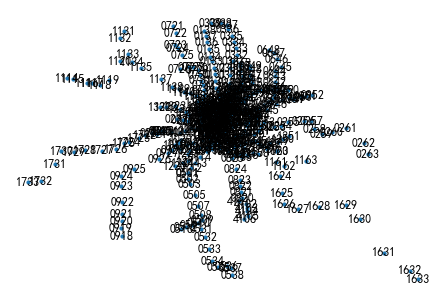

In [31]:
station_graph = nx.Graph()
station_list=[]
for key in station_info:
    station_list.append(stations[key])
station_graph.add_nodes_from(list(station_info.keys()))

nx.draw(station_graph, station_info, with_labels=True, node_size=10)                        

## Build connection between. 

In [32]:
threshold = 0.2   # defined the threshold

In [33]:
all_stations=list(station_info.keys())
print(all_stations)

['0111', '0112', '0113', '0114', '0115', '0116', '0117', '0118', '0119', '0120', '0121', '0122', '0123', '0124', '0125', '0126', '0127', '0128', '0129', '0130', '0131', '0132', '0133', '0134', '0135', '0136', '0137', '0138', '0234', '0235', '0236', '0237', '0238', '0239', '0240', '0241', '0242', '0243', '0244', '0245', '0246', '0247', '0248', '0249', '0250', '0251', '0252', '0253', '0254', '0255', '0256', '0257', '0258', '0259', '0260', '0261', '0262', '0263', '0311', '0312', '0313', '0314', '0315', '0316', '0317', '0318', '0319', '0320', '0321', '0322', '0323', '0324', '0325', '0326', '0327', '0328', '0329', '0330', '0331', '0332', '0333', '0334', '0335', '0336', '0337', '0338', '0339', '0401', '0402', '0403', '0404', '0405', '0406', '0407', '0408', '0409', '0410', '0411', '0412', '0413', '0414', '0415', '0416', '0417', '0418', '0419', '0420', '0421', '0422', '0423', '0424', '0425', '0426', '0501', '0502', '0503', '0505', '0507', '0508', '0509', '0510', '0511', '0512', '0513', '0531',

In [34]:
from collections import defaultdict
def build_connection(station_info):
    nearstations=0
    stations_connection = defaultdict(list)
    all_stations = list(station_info.keys())
    for c1 in all_stations:
        for c2 in all_stations:
            if c1 == c2 : continue
            if get_station_distance(c1,c2) < threshold:
                #print("c1,c2<",threshold,c1,c2)
                nearstations+=1
                stations_connection[c1].append(c2)
    print("near stations:",nearstations)
    print("< threshold",threshold,"km")
    return stations_connection

stations_connection = build_connection(station_info)


near stations: 124
< threshold 0.2 km


In [35]:
k=0
sub_station=0
stations_name=[]
for keysa in stations:
    stations_name.append(stations[keysa])
    for keysb in stations:
        if keysb!=keysa and stations[keysa]==stations[keysb]:
            sub_station+=1
            print(keysa,keysb,stations[keysa])
    k+=1
print("total stations:",k)
print("Among it, sub_stations:",sub_station)
#print("stations_name",stations_name)
print(len(stations_name))

0111 0501 莘庄
0115 0311 上海南站
0116 1227 漕宝路
0117 0401 上海体育馆
0118 0934 徐家汇
0118 1149 徐家汇
0120 0740 常熟路
0121 1052 陕西南路
0121 1233 陕西南路
0123 0245 人民广场
0123 0835 人民广场
0125 1235 汉中路
0125 1332 汉中路
0126 0323 上海火车站
0126 0410 上海火车站
0235 1041 虹桥火车站
0235 1721 虹桥火车站
0236 1042 虹桥2号航站楼
0241 0318 中山公园
0241 0405 中山公园
0242 1147 江苏路
0243 0739 静安寺
0244 1234 南京西路
0244 1334 南京西路
0245 0123 人民广场
0245 0835 人民广场
0246 1056 南京东路
0249 0417 世纪大道
0249 0632 世纪大道
0249 0942 世纪大道
0252 0752 龙阳路
0252 1621 龙阳路
0311 0115 上海南站
0313 1228 龙漕路
0315 0402 宜山路
0315 0933 宜山路
0316 0403 虹桥路
0316 1049 虹桥路
0317 0404 延安西路
0318 0241 中山公园
0318 0405 中山公园
0319 0406 金沙江路
0319 1327 金沙江路
0320 0407 曹杨路
0320 1145 曹杨路
0321 0408 镇坪路
0321 0736 镇坪路
0322 0409 中潭路
0323 0126 上海火车站
0323 0410 上海火车站
0324 0411 宝山路
0326 0839 虹口足球场
0401 0117 上海体育馆
0402 0315 宜山路
0402 0933 宜山路
0403 0316 虹桥路
0403 1049 虹桥路
0404 0317 延安西路
0405 0241 中山公园
0405 0318 中山公园
0406 0319 金沙江路
0406 1327 金沙江路
0407 0320 曹杨路
0407 1145 曹杨路
0408 0321 镇坪路
0408 0736 镇坪路
0409 0322 中潭路
0410 0126 上海火车站

In [40]:
from collections import defaultdict
def build_connection(station_info):
    stations_connection = defaultdict(list)
    for key in lines:
        #print(key)
        len_line=len(lines[key])
        c3=0
        for c1 in (lines[key][0:len_line-1]):
            #print(c1)
            c3+=1
            c2=lines[key][c3]
            stations_connection[c1].append(c2)
            stations_connection[c2].append(c1)
    return stations_connection
stations_connection=build_connection(station_info)  
print(stations_connection)


defaultdict(<class 'list'>, {'0111': ['0112'], '0112': ['0111', '0113'], '0113': ['0112', '0114'], '0114': ['0113', '0115'], '0115': ['0114', '0116'], '0116': ['0115', '0117'], '0117': ['0116', '0118'], '0118': ['0117', '0119'], '0119': ['0118', '0120'], '0120': ['0119', '0121'], '0121': ['0120', '0122'], '0122': ['0121', '0123'], '0123': ['0122', '0124'], '0124': ['0123', '0125'], '0125': ['0124', '0126'], '0126': ['0125', '0127'], '0127': ['0126', '0128'], '0128': ['0127', '0129'], '0129': ['0128', '0130'], '0130': ['0129', '0131'], '0131': ['0130', '0132'], '0132': ['0131', '0133'], '0133': ['0132', '0134'], '0134': ['0133', '0135'], '0135': ['0134', '0136'], '0136': ['0135', '0137'], '0137': ['0136', '0138'], '0138': ['0137'], '0234': ['0235'], '0235': ['0234', '0236'], '0236': ['0235', '0237'], '0237': ['0236', '0238'], '0238': ['0237', '0239'], '0239': ['0238', '0240'], '0240': ['0239', '0241'], '0241': ['0240', '0242'], '0242': ['0241', '0243'], '0243': ['0242', '0244'], '0244':

In [41]:
k=0
sub_station=0
stations_name=[]
for keysa in stations:
    stations_name.append(stations[keysa])
    for keysb in stations:
        if keysb!=keysa and stations[keysa]==stations[keysb]:
            sub_station+=1
            print(keysa,keysb,stations[keysa])
            stations_connection[keysa].append(keysb)
    k+=1
stations_connection["0401"].append("0426")
stations_connection["0426"].append("0401")
print("total stations:",k)
print("Among it, sub_stations:",sub_station)
#print("stations_name",stations_name)
print(len(stations_name))
    


0111 0501 莘庄
0115 0311 上海南站
0116 1227 漕宝路
0117 0401 上海体育馆
0118 0934 徐家汇
0118 1149 徐家汇
0120 0740 常熟路
0121 1052 陕西南路
0121 1233 陕西南路
0123 0245 人民广场
0123 0835 人民广场
0125 1235 汉中路
0125 1332 汉中路
0126 0323 上海火车站
0126 0410 上海火车站
0235 1041 虹桥火车站
0235 1721 虹桥火车站
0236 1042 虹桥2号航站楼
0241 0318 中山公园
0241 0405 中山公园
0242 1147 江苏路
0243 0739 静安寺
0244 1234 南京西路
0244 1334 南京西路
0245 0123 人民广场
0245 0835 人民广场
0246 1056 南京东路
0249 0417 世纪大道
0249 0632 世纪大道
0249 0942 世纪大道
0252 0752 龙阳路
0252 1621 龙阳路
0311 0115 上海南站
0313 1228 龙漕路
0315 0402 宜山路
0315 0933 宜山路
0316 0403 虹桥路
0316 1049 虹桥路
0317 0404 延安西路
0318 0241 中山公园
0318 0405 中山公园
0319 0406 金沙江路
0319 1327 金沙江路
0320 0407 曹杨路
0320 1145 曹杨路
0321 0408 镇坪路
0321 0736 镇坪路
0322 0409 中潭路
0323 0126 上海火车站
0323 0410 上海火车站
0324 0411 宝山路
0326 0839 虹口足球场
0401 0117 上海体育馆
0402 0315 宜山路
0402 0933 宜山路
0403 0316 虹桥路
0403 1049 虹桥路
0404 0317 延安西路
0405 0241 中山公园
0405 0318 中山公园
0406 0319 金沙江路
0406 1327 金沙江路
0407 0320 曹杨路
0407 1145 曹杨路
0408 0321 镇坪路
0408 0736 镇坪路
0409 0322 中潭路
0410 0126 上海火车站

In [42]:
print(stations_connection)

defaultdict(<class 'list'>, {'0111': ['0112', '0501'], '0112': ['0111', '0113'], '0113': ['0112', '0114'], '0114': ['0113', '0115'], '0115': ['0114', '0116', '0311'], '0116': ['0115', '0117', '1227'], '0117': ['0116', '0118', '0401'], '0118': ['0117', '0119', '0934', '1149'], '0119': ['0118', '0120'], '0120': ['0119', '0121', '0740'], '0121': ['0120', '0122', '1052', '1233'], '0122': ['0121', '0123'], '0123': ['0122', '0124', '0245', '0835'], '0124': ['0123', '0125'], '0125': ['0124', '0126', '1235', '1332'], '0126': ['0125', '0127', '0323', '0410'], '0127': ['0126', '0128'], '0128': ['0127', '0129'], '0129': ['0128', '0130'], '0130': ['0129', '0131'], '0131': ['0130', '0132'], '0132': ['0131', '0133'], '0133': ['0132', '0134'], '0134': ['0133', '0135'], '0135': ['0134', '0136'], '0136': ['0135', '0137'], '0137': ['0136', '0138'], '0138': ['0137'], '0234': ['0235'], '0235': ['0234', '0236', '1041', '1721'], '0236': ['0235', '0237', '1042'], '0237': ['0236', '0238'], '0238': ['0237', '0

Draw connection path

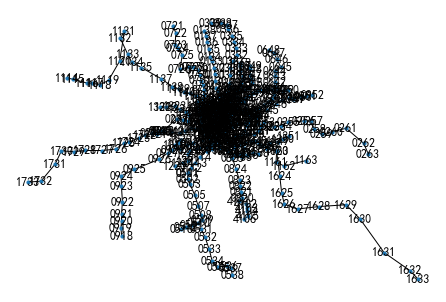

In [43]:
stations_connection_graph = nx.Graph(stations_connection)
nx.draw(stations_connection_graph,station_info,with_labels=True,node_size=10)

In [44]:
def print_line(station_no):
    for keys in lines:
        if station_no in lines[keys]:
            return keys

In [45]:
def print_path(result): #打印路线图
    station_name=[]
    changes=0
    line_name=print_line(result[0])
    print(line_name)
    for i,_ in  enumerate(result[:-1]):
        station_name.append(stations[result[i]])
        print(i,station_name[-1])
        if stations[result[i]]==stations[result[i+1]]:
            changes+=1
            line_name=print_line(result[i+1])
            print("需要换乘:",line_name)
    station_name.append(stations[result[i+1]])
    print(i+1,station_name[-1])
    print("Total stations:",len(result)-changes)

In [46]:
def print_path2(result): #打印路线图
    station_name=[]
    changes=0
    line_name=print_line(result[0])
    print(line_name)
    for i in  result:
        station_name.append(stations[i])
        print(station_name[-1])
        if stations[i]==stations[i+1]:
            changes+=1
            line_name=print_line(result[i+1])
            print("需要换乘:",line_name)
        
    print("Total stations:",len(result)-changes)

In [47]:
a=["1","2","9"]
print("example 01:")    
for i,_ in enumerate(a):
    #print(a[i])
    print(i,a[i])
print("example 02")    
for i,_ in enumerate(a[:-1]):
    #print(a[i])
    print(i,a[i])    
print("example 03")    
for i,_ in enumerate(a[0:-1]):
    #print(a[i])
    print(i,a[i])        

example 01:
0 1
1 2
2 9
example 02
0 1
1 2
example 03
0 1
1 2


BFS search version 1

In [48]:
def search_1(graph,start,destination):
    pathes = [[start]]  # list 用来存储待搜索路径
    visited = set() # set用来存储已搜索的节点
    
    while pathes:
        path = pathes.pop(0)  #提取第一条路径
        froniter = path[-1]   #提取即将要探索的节点
        
        if froniter in visited: continue  #检查如果该点已经探索过 则不用再探索
            
        successsors = graph[froniter]
        
        for city in successsors:      #遍历子节点
            if city in path: continue  # check loop #检查会不会形成环
            
            new_path = path+[city]
            
            pathes.append(new_path)  #bfs     #将新路径加到list里面
            #pathes = [new_path] + pathes #dfs
            
            if city == destination:  #检查目的地是不是已经搜索到了
                return new_path
        visited.add(froniter)
        

In [49]:
#BFS search version 1
station1="九亭"
station2="天潼路"
print ("stations name:",station1,station2)
for key in stations:
    if stations[key]==station1:
        station1=key
    if stations[key]==station2:
        station2=key
print('station NO:',station1,station2)  
if station1!=station2:
    find=search_1(stations_connection,station1,station2)
    print_path(find)
    print(find)
if station1==station2:
    print("太近了，走路就能到！不用坐地铁了。")

stations name: 九亭 天潼路
station NO: 0926 1057
9号线
0 九亭
1 中春路
2 七宝
3 星中路
4 合川路
5 漕河泾开发区
6 桂林路
7 宜山路
8 徐家汇
9 肇嘉浜路
10 嘉善路
需要换乘: 12号线
11 嘉善路
12 陕西南路
13 南京西路
14 汉中路
15 曲阜路
16 天潼路
需要换乘: 10号线
17 天潼路
Total stations: 16
['0926', '0927', '0928', '0929', '0930', '0931', '0932', '0933', '0934', '0935', '0936', '1232', '1233', '1234', '1235', '1236', '1237', '1057']


In [50]:
find=search_1(stations_connection,"0125","1629")
print(find)

['0125', '0124', '0123', '0245', '0246', '0247', '0248', '0249', '0250', '0251', '0252', '1621', '1622', '1623', '1624', '1625', '1626', '1627', '1628', '1629']


### (Optional) Improve your agent to make it able to find a path based on different strategies

###  <评阅点> : 是否正确得到不同目标下的路径。

Some ideas you might want to try:

a. Find the shortest path between two stations.（距离最短）

In [51]:
def search_2(graph,start,destination,search_strategy):
    pathes = [[start]]
    visited = set()# ！
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        if froniter in visited : continue# ！
            
        if froniter == destination:# ！
            return path# ！
        
        successsors = graph[froniter]
        
        for city in successsors:
            if city in path: continue  # check loop
            
            new_path = path+[city]
            
            pathes.append(new_path)  #bfs
            
        pathes = search_strategy(pathes)
        visited.add(froniter) # ！
       #if pathes and (destination == pathes[0][-1]):
       #     return pathes[0]  
        

In [52]:
def sort_by_distance(pathes):
    def get_distance_of_path(path):
        distance = 0
        for i,_ in enumerate(path[:-1]):
            distance += get_station_distance(path[i],path[i+1])
        return distance
    return sorted(pathes,key=get_distance_of_path)


In [53]:
def get_distance_of_path(path):
    distance = 0
    for i,_ in enumerate(path[:-1]):
        distance += get_station_distance(path[i],path[i+1])
    return distance

In [127]:
#method1:
#距离最短
station1="市光路"
station2="云锦路"
print ("stations name:",station1,station2)
for key in stations:
    if stations[key]==station1:
        station1=key
    if stations[key]==station2:
        station2=key
print('station NO:',station1,station2)  
if station1!=station2:
    #find=search_2(stations_connection,station1,station2)
    #find=search_2(stations_connection,station1,station2,search_strategy=lambda x:x)
    find=search_2(stations_connection,station1,station2,search_strategy=sort_by_distance)
    station_name=[]
    for station_no in find:
        station_name.append(stations[station_no])
    print_path(find)
    print(find)
if station1==station2:
    print("太近了，走路就能到！不用坐地铁了。")



stations name: 市光路 云锦路
station NO: 0849 1152
8号线
0 市光路
1 嫩江路
2 翔殷路
3 黄兴公园
4 延吉中路
5 黄兴路
6 江浦路
7 鞍山新村
8 四平路
需要换乘: 10号线
9 四平路
10 邮电新村
11 海伦路
12 四川北路
13 天潼路
14 南京东路
需要换乘: 2号线
15 南京东路
16 人民广场
需要换乘: 1号线
17 人民广场
18 黄陂南路
19 陕西南路
需要换乘: 12号线
20 陕西南路
21 嘉善路
22 大木桥路
23 龙华中路
24 龙华
需要换乘: 11号线
25 龙华
26 云锦路
Total stations: 22
['0849', '0848', '0847', '0846', '0845', '0844', '0843', '0842', '0841', '1061', '1060', '1059', '1058', '1057', '1056', '0246', '0245', '0123', '0122', '0121', '1233', '1232', '1231', '1230', '1229', '1151', '1152']


b. Find the path that requires minimum transfers between two stations.(换乘最少)

In [55]:
def sort_by_changes(pathes):
    def get_changes_of_path(path):
        changes = 0
        for i,_ in enumerate(path[:-1]):
            if stations[path[i]]==stations[path[i+1]]:
                changes+=1
        return changes
    return sorted(pathes,key=get_changes_of_path)

In [56]:
def get_changes_of_path(path): #计算路线的换乘次数
    changes=0
    for i,_ in enumerate(path[:-1]):
        if stations[path[i]]==stations[path[i+1]]:
            changes+=1
    return changes

In [57]:
print_line("0111")

'1号线'

In [58]:
get_changes_of_path(['0936', '1232'])

1

In [126]:
#method changes times less:
#换乘次数最少
station1="市光路"
station2="云锦路"
print ("stations name:",station1,station2)
for key in stations:
    if stations[key]==station1:
        station1=key
    if stations[key]==station2:
        station2=key
print('station NO:',station1,station2)  
if station1!=station2:
    #find=search_2(stations_connection,station1,station2)
    find=search_2(stations_connection,station1,station2,search_strategy=sort_by_changes)
    print_path(find)
    print(find)
if station1==station2:
    print("太近了，走路就能到！不用坐地铁了。")

stations name: 市光路 云锦路
station NO: 0849 1152
8号线
0 市光路
1 嫩江路
2 翔殷路
3 黄兴公园
4 延吉中路
5 黄兴路
6 江浦路
7 鞍山新村
8 四平路
9 曲阳路
10 虹口足球场
11 西藏北路
12 中兴路
13 曲阜路
14 人民广场
15 大世界
16 老西门
17 陆家浜路
18 西藏南路
19 中华艺术宫
20 耀华路
21 成山路
22 杨思
23 东方体育中心
需要换乘: 11号线
24 东方体育中心
25 龙耀路
26 云锦路
Total stations: 26
['0849', '0848', '0847', '0846', '0845', '0844', '0843', '0842', '0841', '0840', '0839', '0838', '0837', '0836', '0835', '0834', '0833', '0832', '0831', '0830', '0829', '0828', '0827', '0826', '1154', '1153', '1152']


c. Combine the previous two ideas, find a more suitable path.（结合两种方法，新招更合适的路径）

In [107]:
def sort_by_dis_changes(pathes):   #根据距离和换乘综合排序
    #from operator import itemgetter, attrgetter
    def get_dis_changes_of_path(path):
        distance = 0
        changes = 0
        for i,_ in enumerate(path[:-1]):
            distance += get_station_distance(path[i],path[i+1])
            if stations[path[i]]==stations[path[i+1]]:
                changes+=1
        dis_changes=(distance,changes)    
        return dis_changes
    return sorted(pathes,key=get_dis_changes_of_path)
    

In [108]:
def sort_by_changes_dis(pathes):   #根据换乘和距离综合排序
    #from operator import itemgetter, attrgetter
    def get_changes_dis_of_path(path):
        distance = 0
        changes = 0
        for i,_ in enumerate(path[:-1]):
            distance += get_station_distance(path[i],path[i+1])
            if stations[path[i]]==stations[path[i+1]]:
                changes+=1
        changes_dis=(changes,distance)    
        return changes_dis
    return sorted(pathes,key=get_changes_dis_of_path)
    

In [93]:
pa=[['0926', '0927', '0928', '0929', '0930', '0931', '0932', '0933', '0934', '0935', '0936', '0937', '0938', '0939', '0940', '0941', '0942', '0417', '0416', '0415', '0414', '0413', '0412'],['0111', '0112', '0113', '0114', '0115', '0116', '0117', '0118', '0119', '0120', '0121', '0122', '0123', '0124', '0125', '0126', '0127', '0128', '0129', '0130', '0131', '0132', '0133', '0134', '0135', '0136', '0137', '0138']]
sort_by_dis_changes(pa)


[['0926',
  '0927',
  '0928',
  '0929',
  '0930',
  '0931',
  '0932',
  '0933',
  '0934',
  '0935',
  '0936',
  '0937',
  '0938',
  '0939',
  '0940',
  '0941',
  '0942',
  '0417',
  '0416',
  '0415',
  '0414',
  '0413',
  '0412'],
 ['0111',
  '0112',
  '0113',
  '0114',
  '0115',
  '0116',
  '0117',
  '0118',
  '0119',
  '0120',
  '0121',
  '0122',
  '0123',
  '0124',
  '0125',
  '0126',
  '0127',
  '0128',
  '0129',
  '0130',
  '0131',
  '0132',
  '0133',
  '0134',
  '0135',
  '0136',
  '0137',
  '0138']]

In [125]:
#method 3:
#距离最短，并且换乘次数最少
station1="市光路"
station2="云锦路"
print ("stations name:",station1,station2)
for key in stations:
    if stations[key]==station1:
        station1=key
    if stations[key]==station2:
        station2=key
print('station NO:',station1,station2)  
if station1!=station2:
    #find=search_2(stations_connection,station1,station2)
    find=search_2(stations_connection,station1,station2,search_strategy=sort_by_dis_changes)
    print_path(find)
    print(find)
if station1==station2:
    print("太近了，走路就能到！不用坐地铁了。")

stations name: 市光路 云锦路
station NO: 0849 1152
8号线
0 市光路
1 嫩江路
2 翔殷路
3 黄兴公园
4 延吉中路
5 黄兴路
6 江浦路
7 鞍山新村
8 四平路
需要换乘: 10号线
9 四平路
10 邮电新村
11 海伦路
12 四川北路
13 天潼路
14 南京东路
需要换乘: 2号线
15 南京东路
16 人民广场
需要换乘: 1号线
17 人民广场
18 黄陂南路
19 陕西南路
需要换乘: 12号线
20 陕西南路
21 嘉善路
22 大木桥路
23 龙华中路
24 龙华
需要换乘: 11号线
25 龙华
26 云锦路
Total stations: 22
['0849', '0848', '0847', '0846', '0845', '0844', '0843', '0842', '0841', '1061', '1060', '1059', '1058', '1057', '1056', '0246', '0245', '0123', '0122', '0121', '1233', '1232', '1231', '1230', '1229', '1151', '1152']


In [124]:
#method 4:
#换乘次数最少，并且距离最短
station1="市光路"
station2="云锦路"
print ("stations name:",station1,station2)
for key in stations:
    if stations[key]==station1:
        station1=key
    if stations[key]==station2:
        station2=key
print('station NO:',station1,station2)  
if station1!=station2:
    #find=search_2(stations_connection,station1,station2)
    find=search_2(stations_connection,station1,station2,search_strategy=sort_by_changes_dis)
    print_path(find)
    print(find)
if station1==station2:
    print("太近了，走路就能到！不用坐地铁了。")

stations name: 市光路 云锦路
station NO: 0849 1152
8号线
0 市光路
1 嫩江路
2 翔殷路
3 黄兴公园
4 延吉中路
5 黄兴路
6 江浦路
7 鞍山新村
8 四平路
9 曲阳路
10 虹口足球场
11 西藏北路
12 中兴路
13 曲阜路
14 人民广场
15 大世界
16 老西门
17 陆家浜路
18 西藏南路
19 中华艺术宫
20 耀华路
21 成山路
22 杨思
23 东方体育中心
需要换乘: 11号线
24 东方体育中心
25 龙耀路
26 云锦路
Total stations: 26
['0849', '0848', '0847', '0846', '0845', '0844', '0843', '0842', '0841', '0840', '0839', '0838', '0837', '0836', '0835', '0834', '0833', '0832', '0831', '0830', '0829', '0828', '0827', '0826', '1154', '1153', '1152']


Compare your results with results obtained by using some apps such as Baidu map, A map, Google map or Apple map. If there is difference, try to explanate it.（与百度地图结果进行比较，如果存在不同，进行解释）

## Congratulations ! You have finished the assignment of week 2.

![title](img/agent.png)

### If you have any suggestions regarding the teaching, please feel free to send them to my eamil (eric.lee.xiao@gmail.com) 